## Introduction

Personal Project by Arvin Assanny

### Description
In this assignment, we are given a dataset containing the travel history of Uber and Lyft passengers in the City of Boston, MA

(Dataset Link : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

### Problem Statement
`Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.`

## Import Library

In [2]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing our Regression Models
from sklearn.linear_model import LinearRegression

#Importing our Train and Test split
from sklearn.model_selection import train_test_split

#For preprocessing purposes 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#For evaluation purposes
from sklearn.metrics import mean_absolute_error, r2_score

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

#Setting this notebook to show all data
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Checking sklearn version
import sklearn
sklearn.__version__

# Model Saving
import joblib
import json

## Loading Data

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,12/17/2018 18:25,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,11/26/2018 5:03,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,42.3503,-71.081,41.99,41.99,

In [4]:
# Duplicate Dataset

data = df.copy()

Now we have loaded and duplicated our dataset, going forward we will use our duplicated dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

We know that we have 57 column in our dataset and also a mismatch datatype on datetime column which we will deal later.

In [6]:
# Change datetime type into date time
pd.to_datetime(data['datetime'])
data['datetime']

0         12/16/2018 9:30
1         11/27/2018 2:00
2         11/28/2018 1:00
3         11/30/2018 4:53
4         11/29/2018 3:49
               ...       
693066    12/1/2018 23:53
693067    12/1/2018 23:53
693068    12/1/2018 23:53
693069    12/1/2018 23:53
693070    12/1/2018 23:53
Name: datetime, Length: 693071, dtype: object

We see here that the datatype has been changed.

In [7]:
# Check duplicates
data.duplicated().sum()

0

No duplicates entry found

In [8]:
# Rename columns
data.rename(columns={'cab_type' : 'provider', 'name' : 'service'}, inplace=True)

Here we proceed to rename some of our column to give us better understanding about our dataset.

### Data describe

In [9]:
# We want to know our numerical data more
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544049e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,7.056569e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

* We can see that `price` column might have a skewed data distribution, because its mean(16.54) and median(13.50) are located apart
* Also on `distance` column we can see that the shortest distance is 0.02 mile(since in US, they use imperial system. so it is not kilometer) and the farthest distance is 7.86 mile. This is might be an outlier, but we must look deeper later.

### Check missing value

In [10]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
provider                           0
product_id                         0
service                            0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

There are so many missing values on `price` column, which will be our target. Therefore we have to drop it later.

We want to drop it because the missing value is in our target column, which we need to remove.

In [11]:
data.dropna(axis = 0, inplace=True)

In [12]:
data.reset_index()
data.shape

(637976, 57)

Here we have dropped all the missing values in our data, we also reset index to make it tidier.

We also want to check if there are any uncommon missing values.

In [13]:
#checking other common missing values
miss = {}

for i in list(data.columns):
    miss[i] = 0
    for a in data[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'id': 0,
 'timestamp': 0,
 'hour': 0,
 'day': 0,
 'month': 0,
 'datetime': 0,
 'timezone': 0,
 'source': 0,
 'destination': 0,
 'provider': 0,
 'product_id': 0,
 'service': 0,
 'price': 0,
 'distance': 0,
 'surge_multiplier': 0,
 'latitude': 0,
 'longitude': 0,
 'temperature': 0,
 'apparentTemperature': 0,
 'short_summary': 0,
 'long_summary': 0,
 'precipIntensity': 0,
 'precipProbability': 0,
 'humidity': 0,
 'windSpeed': 0,
 'windGust': 0,
 'windGustTime': 0,
 'visibility': 0,
 'temperatureHigh': 0,
 'temperatureHighTime': 0,
 'temperatureLow': 0,
 'temperatureLowTime': 0,
 'apparentTemperatureHigh': 0,
 'apparentTemperatureHighTime': 0,
 'apparentTemperatureLow': 0,
 'apparentTemperatureLowTime': 0,
 'icon': 0,
 'dewPoint': 0,
 'pressure': 0,
 'windBearing': 0,
 'cloudCover': 0,
 'uvIndex': 0,
 'visibility.1': 0,
 'ozone': 0,
 'sunriseTime': 0,
 'sunsetTime': 0,
 'moonPhase': 0,
 'precipIntensityMax': 0,
 'uvIndexTime': 0,
 'temperatureMin': 0,
 'temperatureMinTime': 0,
 'temperatu

There is not any missing values in our data now.

In [14]:
data.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,provider,product_id,service,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


We have done some cleaning, now proceed to do some exploration

## Exploratory Data Analysis (EDA)

We now want to do some exploration with our dataset, which will help us to gain some insights and facts from our data. Also this will help us to limit the column we will choose as the feature in our model.

### min_max date

In [15]:
data.datetime.agg(['min','max'])

min    11/26/2018 10:02
max     12/9/2018 23:58
Name: datetime, dtype: object

We can see that first date of data and its last.



### `product_id`, `provider` and `cab_type` column

Now we want to see what are type of `product_id`,  `provider` and `cab_type` column

In [16]:
# Checking unique value of our columns
print(f'Number of unique values :', data['provider'].nunique())
data['provider'].value_counts()

Number of unique values : 2


Uber    330568
Lyft    307408
Name: provider, dtype: int64

There are two type of provider, now we want to see cab_type column which i believe is a more detailed version of provider.

In [17]:
# Checking unique value of our columns
print(f'Number of unique values :', data['service'].nunique())
data['service'].value_counts()

Number of unique values : 12


UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: service, dtype: int64

We have 12 type of services, which i believe is some kind of classes of services in our providers.

Now we want to check product_id column

In [18]:
# Checking unique value of our columns
print(f'Number of unique values :', data['product_id'].nunique())
data['product_id'].value_counts()

Number of unique values : 12


6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Here we can see 12 type in `product_id`, which are similar to `service` column. Therefore it will only choose `service` column to avoid overfitting

### Looking some business insight

Now we want to look for some insight about our data, in order to understand it more

#### 1. What is the provider that used more by customer?

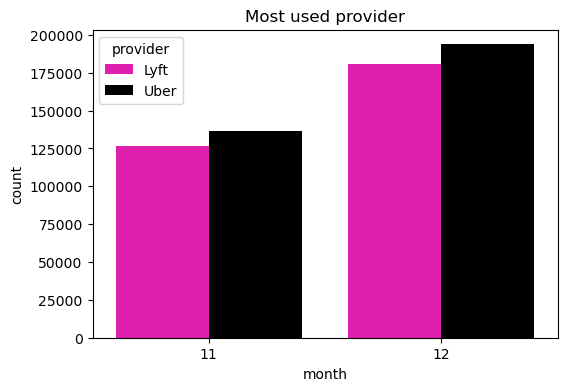

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='month', data=data, hue='provider', palette=["#ff00bf", '#000000'])
plt.title('Most used provider')
plt.show()

Uber has more customer than lyft in two months period as seen here. Also the customer are rising from time to time.

#### 2. What is the highest paid services by price?

In [20]:
data.groupby('service')['price'].max().reset_index().sort_values(by='price', ascending=False)

,service,price
4,Lux Black XL,97.5
1,Black SUV,89.5
10,UberXL,76.0
3,Lux Black,75.0
0,Black,68.5
6,Lyft XL,65.0
2,Lux,55.0
9,UberX,44.0
11,WAV,44.0
8,UberPool,42.5


Lux Black XL has the highest price compared to other services with USD 97.5.

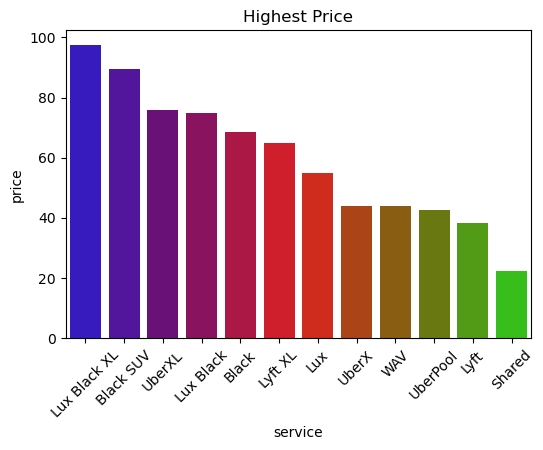

In [21]:
# Make plot using maximum prices
high_price = data.groupby('service')['price'].max().reset_index().sort_values(by = 'price', ascending = False)

plt.figure(figsize=(6,4))
plt.title('Highest Price')
sns.barplot(x = high_price.service, y = high_price.price, palette='brg');
plt.xticks(rotation = 45)
plt.show()

Here using plot we can see the price differences between services.

#### 3. What is the most busy hour?

Now we want to the busy hour in our data, where the most order are made.

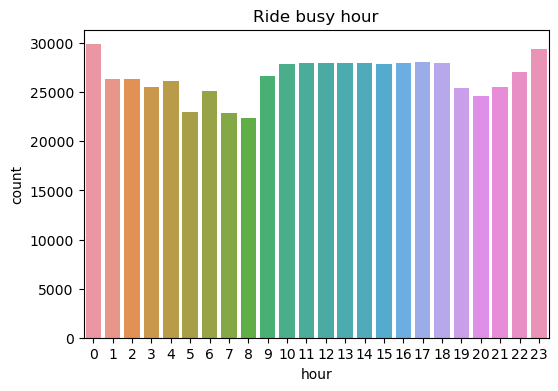

In [22]:
# Ploting
plt.figure(figsize=(6,4))
sns.countplot(x='hour', data=data)
plt.title('Ride busy hour')
plt.show()

We can see that 23 and 24 hours are the bussiest time on these ride-hailing services.

### Focus on Target and Features

Now we want to take a closer look with our target and features we will use on modeling.

#### Target

We choose `price` column in our model as a target, but first we want to look more about it.

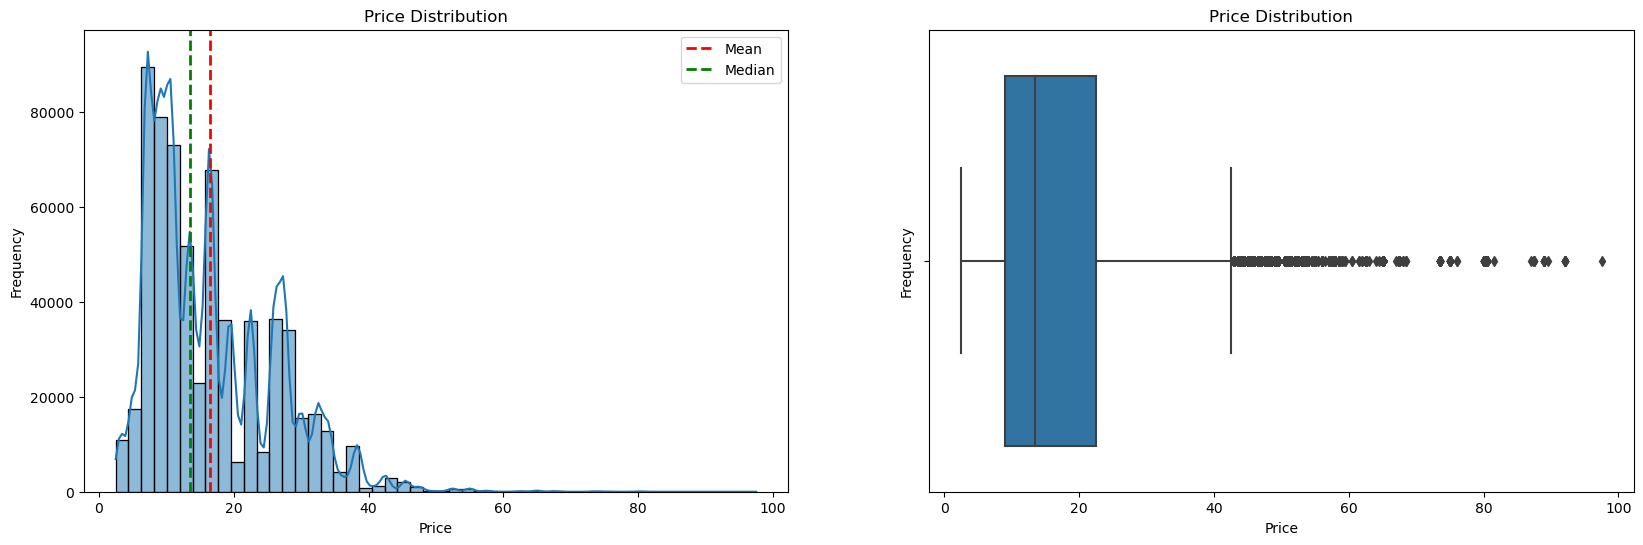

Skewness value: 1.0457470560899258
Mean: 16.545125490614065
Median: 13.5


In [23]:
# Setting plot size
plt.figure(figsize=(20,6))

# Subplot
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=data, bins=50, kde=True)
plt.axvline(data.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=data)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Print some information about data
print(f'Skewness value: {data.price.skew()}')
print(f'Mean: {data.price.mean()}')
print(f'Median: {data.price.median()}')


We can see here that the `price` column has highly skewed distribution and also has some outliers.

#### Hour, day vs price column

Now we want to see some relationship between some feature with our target, this process will help us during feature selection later.

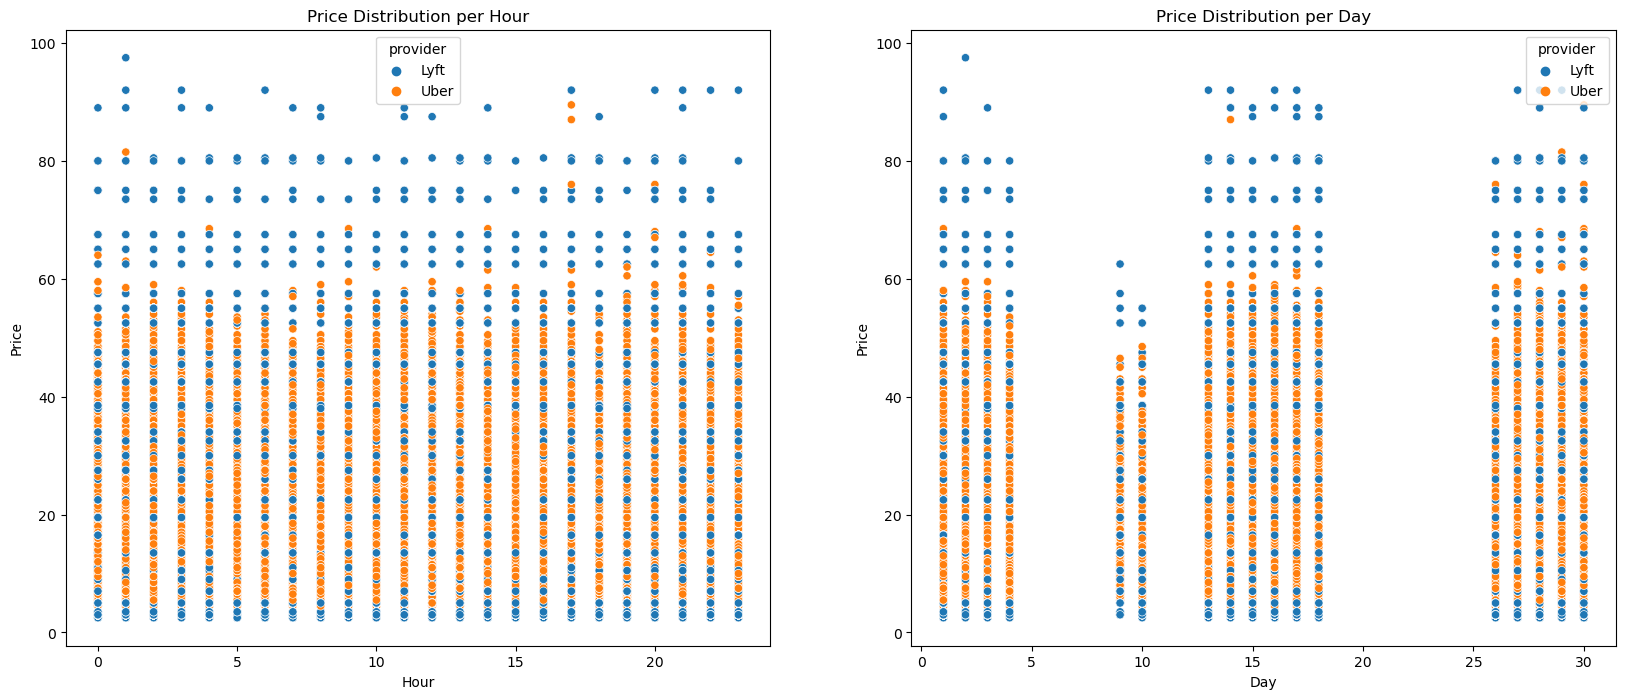

In [24]:
# Plotting
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='hour', y='price', data=data, hue='provider')
plt.title('Price Distribution per Hour')
plt.xlabel('Hour')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='day', y='price', data=data, hue='provider')
plt.title('Price Distribution per Day')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

We can see that we failed to find relation between `Hour` and `Day` column with `price`, where the prices does not follow any pattern to determine its value.

### `Distance` column

First we want to see the distribution of our data then we will proceed to find some relationship with `price` column

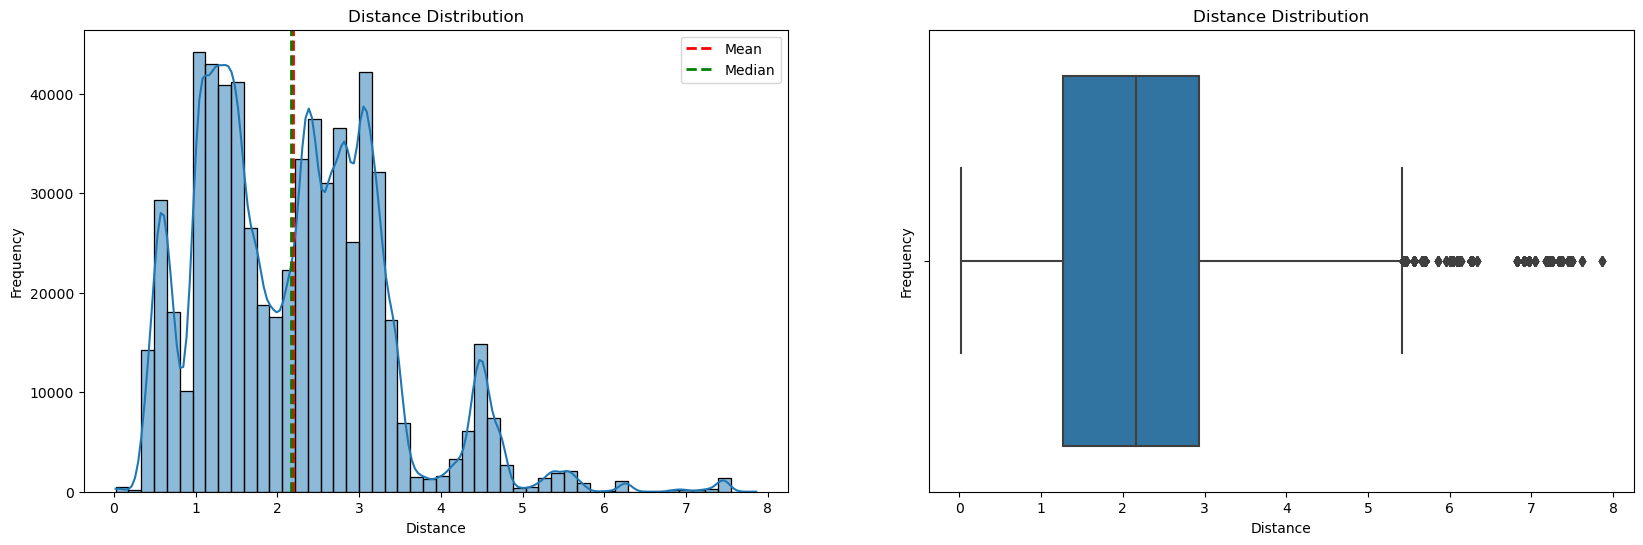

Skewness value: 0.8168484903389348
Mean: 2.189261100730992
Median: 2.16


In [25]:
# Setting plot size
plt.figure(figsize=(20,6))

# Subplot
plt.subplot(1, 2, 1)
sns.histplot(x='distance', data=data, bins=50, kde=True)
plt.axvline(data.distance.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.distance.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='distance', data=data)
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Print some information about data
print(f'Skewness value: {data.distance.skew()}')
print(f'Mean: {data.distance.mean()}')
print(f'Median: {data.distance.median()}')

We can see some skewness in `distance` data distribution, which appears as Right-Skewed. But we can see that the median and mean of this column are somehow close, this may be caused by the outlier that are appeared on the box plot.

Now we want to see relation between `distance` and `price` column

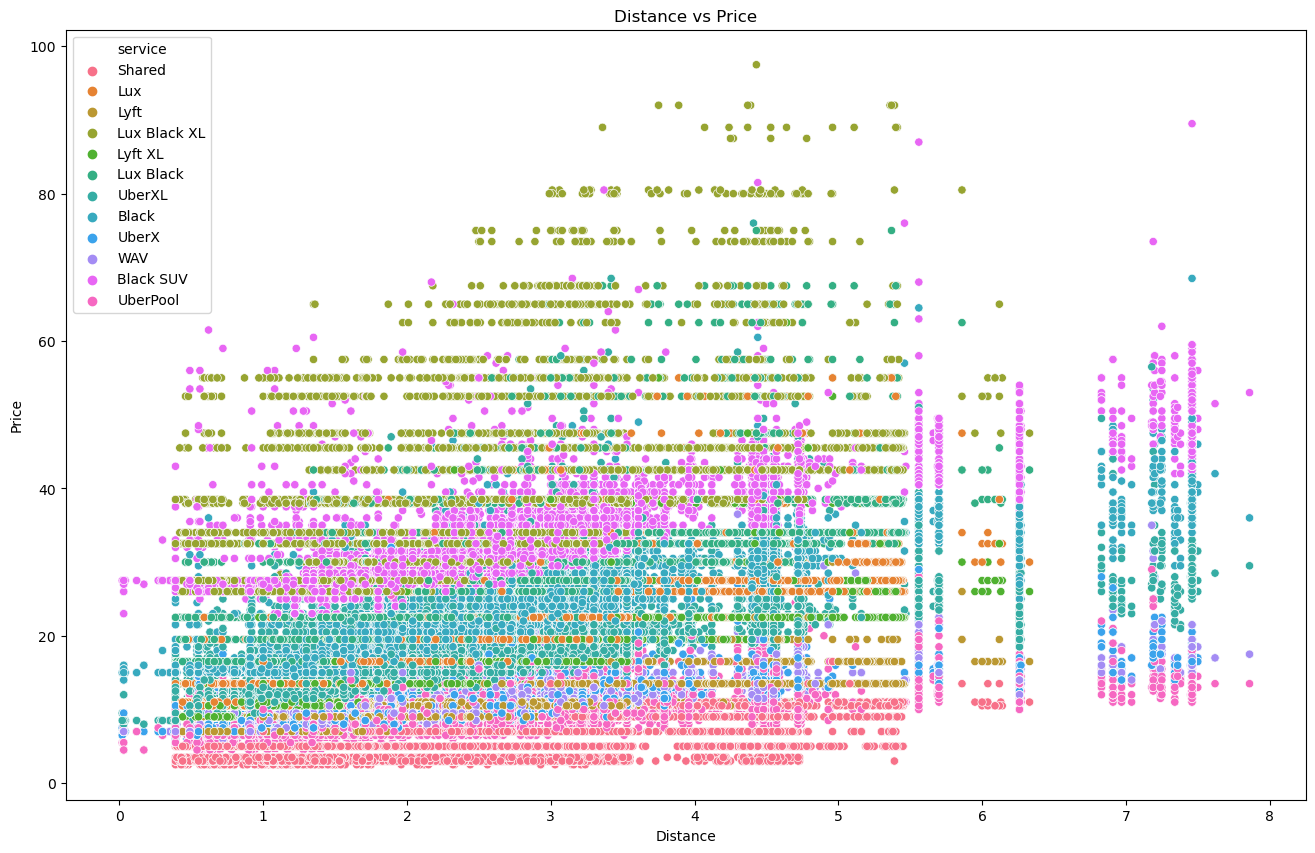

In [26]:
# Setting up plots
plt.figure(figsize=(16,10))
sns.scatterplot(x='distance', y='price', data=data, hue='service')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

We can see that there is a Positive Correlation, when the distance increase the price will also increase.

#### `Surge Multiplier` column

In [27]:
# Check surge multiplier rates
data.groupby(['provider', 'surge_multiplier']).size()

provider  surge_multiplier
Lyft      1.00                286433
          1.25                 11085
          1.50                  5065
          1.75                  2420
          2.00                  2239
          2.50                   154
          3.00                    12
Uber      1.00                330568
dtype: int64

Lyft have some surge multiplier rates ranges between 1.00 - 3.00, while uber do not.

Next, we want to see relationship between surge multiplier and price

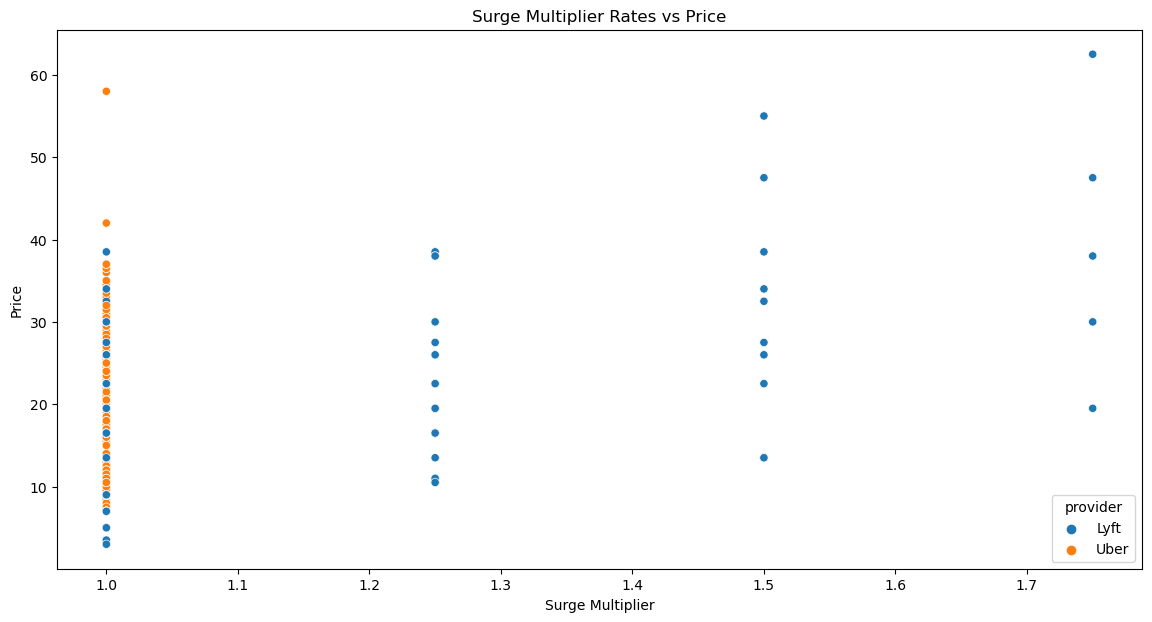

In [28]:
# Setting up plots
plt.figure(figsize=(14,7))
sns.scatterplot(x='surge_multiplier', y='price', data=data[data['distance']==2.7], hue='provider')
plt.title('Surge Multiplier Rates vs Price')
plt.xlabel('Surge Multiplier')
plt.ylabel('Price')
plt.show()

On this plot, we set the distance to 2.7 mile which may give us a easier look with this result. We can see that when we order a ride for 2.7 mile in distance, the price will increase as the surge multiplier incearsed too. 

So, we can say that there is a positive correlation between this two columns

#### `short_summary` column vs price

Now we want to see that does weather condition affects the price or not. Here we only use short_summary column, because from my understanding it is the best way to describe the weather condition whenever the customer order for a ride.

In [29]:
data.head(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,provider,product_id,service,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0,0.0,0.68,8.66,9.17,1545015600,10.0,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.7,1021.98,57,0.72,0,10.0,303.8,1544962084,1544994864,0.3,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000


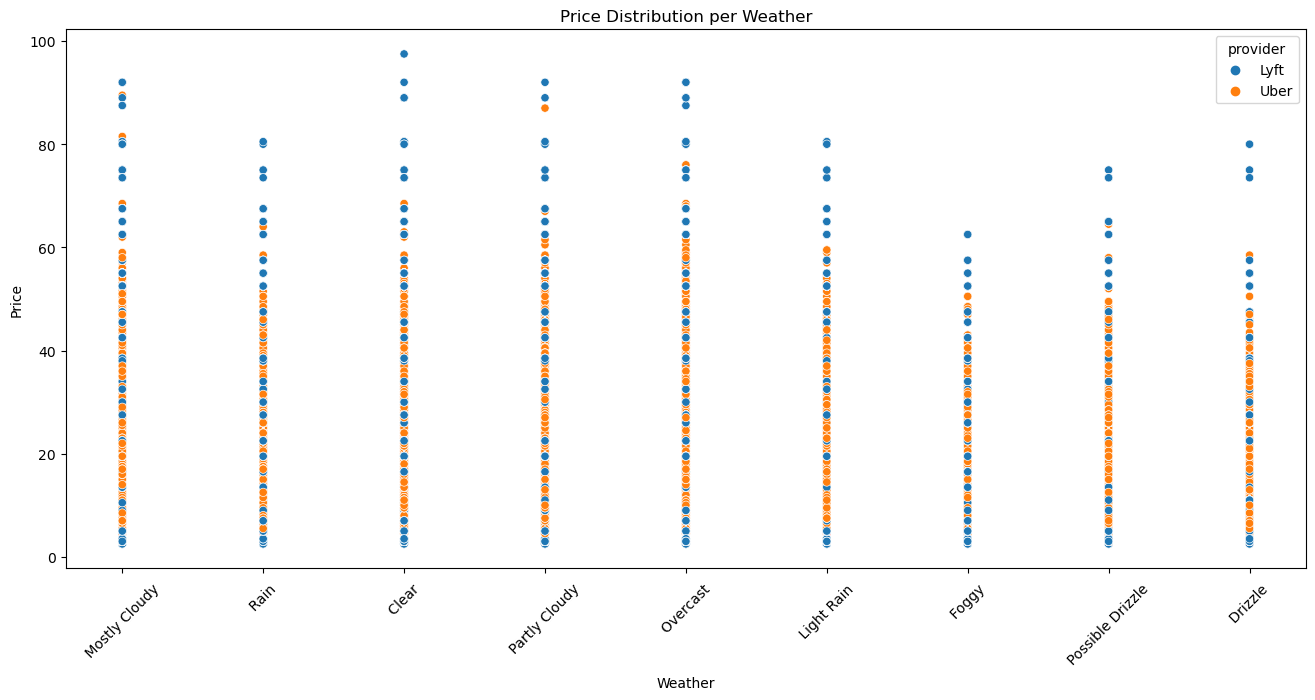

In [30]:
# See if weather affects the price as well
plt.figure(figsize=(16,7))
sns.scatterplot(x='short_summary', y='price', data=data, hue='provider')
plt.title('Price Distribution per Weather')
plt.xlabel('Weather')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

We can see that the weather condition does not have a clear relationship with increased price.

#### Numerical Correlation

In [31]:
# Show correlation between numerical column using correlation matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.020855,-0.334357,0.757314,0.000760,0.003044,0.000441,0.165584,-0.136972,-0.241316,-0.220288,-0.176942,-0.139330,-0.162880,-0.062104,0.006258,0.982241,0.153599,-0.224059,0.982534,-0.358323,0.982406,-0.212526,0.982484,-0.393726,0.982453,-0.257227,0.521897,-0.138311,-0.076065,-0.027839,0.153599,0.193568,0.982560,0.982560,-0.832018,-0.199525,0.982556,-0.296115,0.981268,-0.183444,0.982543,-0.366970,0.981783,-0.156667,0.982492
hour,-0.020855,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.334357,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.757314,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000760,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003044,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000441,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.165584,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

Here we use correlation matrix to show correlation betweeen price column with some of our feature columns. We can say that statistically, only `distance` and `surge_multiplier` columns that correlate with `price` column as another feature only have correlation value near zero.

Later, we will use these columns in feature selection.

#### Categorical Correlation

Now we also want to know which category column has correlation with `price` column. To get this correlation matrix i use pd.get_dummies() which has a similar work to OneHotEncoder

Source: 
(https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc)

In [32]:
cat_corr = pd.get_dummies(data[['price', 'source', 'destination', 'provider', 'service', 'short_summary']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,provider_Lyft,provider_Uber,service_Black,service_Black SUV,service_Lux,service_Lux Black,service_Lux Black XL,service_Lyft,service_Lyft XL,service_Shared,service_UberPool,service_UberX,service_UberXL,service_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
price,1.000000,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,0.083385,-0.083385,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,-0.256930,-0.223551,-0.028587,-0.223557,-0.002387,-0.000480,-0.000052,0.000508,0.002734,-0.000729,0.000350,-0.001137,-0.000104
source_Back Bay,-0.016101,1.000000,-0.090641,-0.090950,-0.090944,-0.091903,-0.090926,-0.090949,-0.090393,-0.090942,-0.090939,-0.090977,-0.090771,-0.090967,-0.090640,0.087136,0.087887,-0.091898,0.090336,0.102169,-0.090394,0.090084,0.088027,-0.090966,-0.090782,0.000229,-0.000229,-0.000068,-0.000070,0.000073,0.000073,0.000073,0.000073,0.000073,0.000056,-0.000062,-0.000067,-0.000070,-0.000070,-0.000300,0.001399,0.001078,0.001025,-0.001342,0.002156,-0.002511,-0.000151,0.000552
source_Beacon Hill,-0.028396,-0.090641,1.000000,-0.090614,-0.090608,-0.091563,-0.090590,-0.090613,-0.090059,-0.090606,-0.090603,-0.090641,-0.090435,-0.090630,-0.090305,0.084072,0.088158,-0.091559,0.090492,0.099522,-0.090059,0.092852,0.088525,-0.090629,-0.090446,0.000030,-0.000030,-0.000006,-0.000008,0.000009,0.000009,0.000009,0.000009,0.000009,0.000012,-0.000020,-0.000004,-0.000008,-0.000008,-0.001102,-0.001225,0.005182,0.001649,0.001009,-0.001928,0.000406,-0.001568,0.000218
source_Boston University,0.074634,-0.090950,-0.090614,1.000000,-0.090917,-0.091876,-0.090899,-0.090922,-0.090366,-0.090915,-0.090912,-0.090950,-0.090744,0.087160,0.083949,-0.090922,-0.090917,0.089974,-0.090922,-0.090915,0.089665,-0.090916,-0.090911,0.097256,0.097511,-0.000010,0.000010,0.000002,0.000001,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000000,0.000009,0.000004,0.000001,0.000001,-0.000050,-0.000027,-0.003610,-0.001658,0.002398,-0.001953,0.001388,-0.004223,0.005236
source_Fenway,0.059317,-0.090944,-0.090608,-0.090917,1.000000,-0.091870,-0.090894,-0.090916,-0.090360,-0.090910,-0.090906,-0.090944,-0.090738,0.088037,0.088161,-0.090916,-0.090912,0.089501,-0.090916,-0.090910,0.094629,-0.090911,-0.090905,0.083608,0.101595,0.000023,-0.000023,-0.000007,-0.000009,0.000006,0.000006,0.000006,0.000006,0.000006,0.000010,-0.000001,-0.000006,-0.000009,-0.000009,0.000459,0.000698,-0.000602,-0.004589,-0.000976,0.000486,0.003323,-0.000819,0.000558
source_Financial District,0.053468,-0.091903,-0.091563,-0.091876,-0.091870,1.000000,-0.091852,-0.091875,-0.091313,-0.091868,-0.091864,-0.091903,-0.091694,-0.091892,-0.091562,0.089964,0.089733,-0.092834,0.097877,0.083025,-0.091314,0.088515,0.102078,-0.091892,-0.091706,0.001375,-0.001375,-0.000408,-0.000410,0.000424,0.000424,0.000424,0.000424,0.000424,0.000407,-0.000402,-0.000407,-0.000410,-0.000410,-0.000405,-0.001943,0.000227,0.005497,0.001492,-0.001012,-0.001837,-0.001324,-0.002146
source_Haymarket Square,-0.095924,-0.090926,-0.090590,-0.090899,-0.090894,-0.091852,1.000000,-0.090899,-0.090343,-0

Here we can see that `price` correlates the highest with `service` column, which means that this column will be used in our feature selection.

This is caused by the fact that another categorical feature have near zero correlation with `price` column.

## Data Preprocessing

In this step, we will prepare our dataset to be fitted into our model.

### Feature Selection

We will select the feature that has the highest correlation with our target column.

In [33]:
dropped_col_df = data.drop(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'provider', 'product_id',
       'latitude', 'longitude','temperature', 'apparentTemperature','short_summary','long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],axis=1)
dropped_col_df

,service,price,distance,surge_multiplier
0,Shared,5.0,0.44,1.0
1,Lux,11.0,0.44,1.0
2,Lyft,7.0,0.44,1.0
3,Lux Black XL,26.0,0.44,1.0
4,Lyft XL,9.0,0.44,1.0
...,...,...,...,...
693065,WAV,9.5,1.00,1.0
693066,UberXL,13.0,1.00,1.0
693067,UberX,9.5,1.00,1.0
693069,Black SUV,27.0,1.00,1.0


We only want `service`, `distance`, `surge_multiplier` column for our features and `price` as our target

### Train-Test Split

We will use a ratio of 8:2 which 80% data will be `Train` data and 20% data will be `Test` data

In [34]:
# Splitting Features and Target
X = dropped_col_df.drop('price', axis = 1)
y = dropped_col_df['price']

# Display X without the target
X

,service,distance,surge_multiplier
0,Shared,0.44,1.0
1,Lux,0.44,1.0
2,Lyft,0.44,1.0
3,Lux Black XL,0.44,1.0
4,Lyft XL,0.44,1.0
...,...,...,...
693065,WAV,1.00,1.0
693066,UberXL,1.00,1.0
693067,UberX,1.00,1.0
693069,Black SUV,1.00,1.0


In [35]:
# Splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13) 

# Checking train and test size

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (510380, 3)
Test Size :  (127596, 3)


Here we finally split our data.

### Handling Outlier

We want to handle outlier in X_train which is `distance` column. Previously, we already know that this column has outlier as we already cover this on our EDA.

In [36]:
X_train.distance.skew()

0.8171388054561868

We will use IQR method because our data distribution is skewed

In [37]:
IQR = X_train.distance.quantile(0.75) - X_train.distance.quantile(0.25)
lower_bound = X_train.distance.quantile(0.25) - (IQR * 1.5)
upper_bound = X_train.distance.quantile(0.75) + (IQR * 1.5)

In [38]:
print(f'Number of outliers: {len(X_train[(X_train.distance < lower_bound) | (X_train.distance > upper_bound)])}')

Number of outliers: 5719


Next, we will drop these outlier.

In [39]:
X_train = X_train[(X_train.distance > lower_bound) & (X_train.distance < upper_bound)]

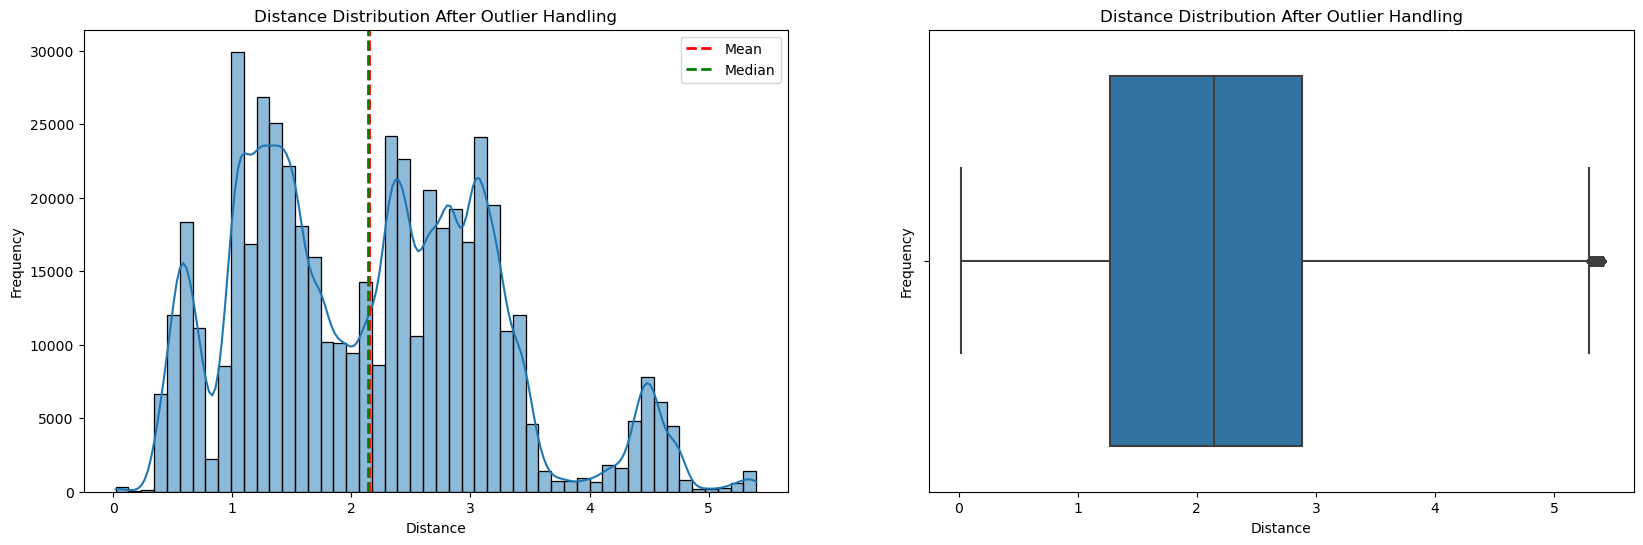

In [40]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='distance', data=X_train, bins=50, kde=True)
plt.axvline(X_train.distance.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(X_train.distance.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distance Distribution After Outlier Handling')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='distance', data=X_train)
plt.title('Distance Distribution After Outlier Handling')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [41]:
X_train.distance.skew()

0.4577158814677923

The distribution is now normal.

We want to filter and check the lenght of our train data, so it can be fitted into our model later.

In [42]:
X_train.shape

(504661, 3)

In [43]:
# filtering with isin and checking the length of current target train
y_train_trim = y_train[y_train.index.isin(X_train.index)]
len(y_train_trim)

504661

In [44]:
y_train_trim.shape

(504661,)

In [45]:
X_test.shape

(127596, 3)

In [46]:
y_test.shape

(127596,)

Now both feature and target are in the same lenght

### Handling Missing Values

We already drop the missing value on our target, and since none of the missing value appear in our feature we can go ahead to the next step.

### Spliting Numberical and Categorical Columns

In [47]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 2
Numerical columns: ['distance', 'surge_multiplier']
Number of categorical columns: 1
Categorical columns: ['service']


### Feature Encoding

We will use encoder to change category into numerical. We will use OneHotEncoder, because our data is a nominal type 

In [48]:
encoder = OneHotEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

Now we have encode our data. Next, we want to make it a DataFrame

In [49]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

Now check our data which has been encoded.

In [50]:
X_train_cat_encoded.head(2)

,service_Black,service_Black SUV,service_Lux,service_Lux Black,service_Lux Black XL,service_Lyft,service_Lyft XL,service_Shared,service_UberPool,service_UberX,service_UberXL,service_WAV
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
X_test_cat_encoded.head(2)

,service_Black,service_Black SUV,service_Lux,service_Lux Black,service_Lux Black XL,service_Lyft,service_Lyft XL,service_Shared,service_UberPool,service_UberX,service_UberXL,service_WAV
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Here we can see out category data has been encoded.

### Feature Scaling

Now we want to scaling our data to normalize, because we have a different range between `distance` and `surge_multiplier`

Here we will use *StandardScaler*

In [52]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Now we want to change into dataframe

In [53]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

Next we want to show the result of scaling.

In [54]:
X_train_num_scaled.head(3)

,distance,surge_multiplier
0,-1.009781,-0.158769
1,-0.478526,-0.158769
2,-1.057214,-0.158769


In [55]:
X_test_num_scaled.head(3)

,distance,surge_multiplier
0,0.650389,-0.158769
1,-0.165466,-0.158769
2,-0.706207,-0.158769


We can see that our features has been normalized

### Concat Feature Numberic and Categorial Columns
Now we want to merge the feature we have been encoded and scaled

In [56]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

Show the updated X_train and X_test

In [57]:
X_train.head()

,distance,surge_multiplier,service_Black,service_Black SUV,service_Lux,service_Lux Black,service_Lux Black XL,service_Lyft,service_Lyft XL,service_Shared,service_UberPool,service_UberX,service_UberXL,service_WAV
0,-1.009781,-0.158769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.478526,-0.158769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.057214,-0.158769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.706207,7.653430,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.043241,-0.158769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
X_test.head()

,distance,surge_multiplier,service_Black,service_Black SUV,service_Lux,service_Lux Black,service_Lux Black XL,service_Lyft,service_Lyft XL,service_Shared,service_UberPool,service_UberX,service_UberXL,service_WAV
0,0.650389,-0.158769,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.165466,-0.158769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.706207,-0.158769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.157082,-0.158769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.047727,-0.158769,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Definition

Here we will use Linear Regression model

In [59]:
model = LinearRegression()

In [60]:
y_train.shape

(510380,)

In [61]:
X_train.shape


(504661, 14)

## Model Training

In [62]:
# Train using Linear Regression model
model.fit(X_train, y_train_trim)

LinearRegression()

## Model Evaluation
We will use Mean absolute error and R-squared score to evaluate our model.

In [63]:
# Predict Train-Set and Test-Set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train

array([ 5.75714111,  8.29534912,  5.61419678, ..., 12.89025879,
       29.82574463, 18.00408936])

Here we make our prediction using our model, now we want to eavluate use our metrics

In [64]:
# Evaluate Model using MAE and r2
print('----Training Set----')
print('MAE train = ', mean_absolute_error(y_train_trim, y_pred_train))
print('r2score train = ', r2_score(y_train_trim, y_pred_train))
print('----Testing Set----')
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))
print('r2score test = ', r2_score(y_test, y_pred_test))

----Training Set----
MAE train =  1.7411746621480881
r2score train =  0.9297258447740868
----Testing Set----
MAE test =  1.782703461962892
r2score test =  0.9270609264109327


Here we successfully evaluate our model, next we will explain it a little bit.

## Model Analysis

* Our model using linear regression can be considered a good fit because the differences between MAE train and test is not too far.

* With MAE test of 1,78 our predicted result might have a miss prediction +- USD 1.78. Even though it might be bigger or smaller than our error.

* With r2 score test of 0.927, the model feature `distance`, `name`, `surge_multiplier` can explain 93% of what variable may affect the `price` column.

## Model Saving

In [65]:
# Savinng files

with open('model_lin_reg.pkl','wb') as file_1:
    joblib.dump(model, file_1)

with open('model_mm_scaler.pkl', 'wb') as file_2:
     joblib.dump(scaler, file_2)

with open('model_OHE_encoder.pkl', 'wb') as file_3:
     joblib.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
     json.dump(num_cols, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
     json.dump(cat_cols, file_5)

# Conclusion

From doing EDA we can conclude that:
* Uber has more customer than lyft in two months period. Also the customer are rising from time to time.
* We have 12 type of services, which i believe is some kind of classes of services in our providers.
* Lux Black XL has the highest price compared to other services with USD 97.5.
* We can see that 23 and 24 hours are the bussiest time on these ride-hailing services.
* We only want `service`, `distance`, `surge_multiplier` column for our features and `price` as our target. We choose this feature because these columns have high correlation with our target.

From our model using Linear Regression, we can conclude that:
* Our model using linear regression can be considered a good fit.
* With MAE test of 1,78 our predicted result might have a miss prediction +- USD 1.78.
* With r2 score test of 0.927, the model feature `distance`, `name`, `surge_multiplier` can explain 93% of what variable may affect the `price` column.

Future Improvement:
* We might get better result by  polynomial regression, Ridge regression, or lasso regression.

